Daniel Dergham did everything.

`````
Contribution Checkpoints:

A: Project idea - 5%
B: Dataset Curation and Preprocessing - 10%
C: Data Exploration and Summary Statistics - 10%
D: ML Algorithm Design/Development - 25%
E: ML Algorithm Training and Test Data Analysis - 20%
F: Visualization, Result Analysis, Conclusion - 15%
G: Final Tutorial Report Creation - 10%
H: Additional (not listed above, if any) - 5%

Member 1: Daniel Dergham A,B,C,D,E,F,G,H == 100%

I, Daniel Dergham 5/7/24 agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.
`````

## **Introduction**

Predicting Stock Closing Prices
===============================

### Spring 2024 Data Science Project

**Contributor:** Daniel Dergham

I am studing both Computer Science and Economics, so data science is a topic that heavily coalign with my interests. In my project I delve into the world of financial markets with a focus on predicting stock closing prices. In the mode that I will create my primary goal is to determine whether historical data such as opening prices, highest prices, lowest prices, and trading volumes can predict the closing prices of stocks on the same day.

Understanding and predicting stock prices is crucial for traders, investors, and financial analysts it's the foundatin for effective investment strategies, risk management, and financial planning. Accurately predicting closing prices can actually help in maximizing investment returns and minimizing potential losses. In my project I aim to use various machine learning techniques to find the most effective method for predicting stock prices, which wil then provide  insights into the movements of financial markets. Utimately this model will be used to increase investment confindence which can have astronomical finanical benefits for not only wall sreet bankers, but everday investors like you and me!

**Hypothesis**: The closing prices of stocks can be predicted with significant accuracy using the historical data of opening prices, highest prices, lowest prices, and trading volume of the same day.






## **Data Curation**

In my project I utilize a finnacial dataset from Yahoo Finance, which is from the period 2018 to 2023. I got the dataset from Kaggle.(https://www.kaggle.com/datasets/suruchiarora/yahoo-finance-dataset-2018-2023)

### **Dataset Description**

The dataset includes daily trading info such as the opening price, high price, low price, closing price, adjusted closing price, and the volume of trades. Each entry in the set corresponds to a single trading day for a given stock. This prvides a detailed snapshot of stock market activity over the years.

### **Data Preparation**

To prep the data for analysis first i wil load it into a pandas DataFrame. That offers a versatile strucure data which i feel is  ideal for the data manipulation and analysis in i am atteming in Python. The steps i wil take to pre-proces the data is as follows:

*   **Data Cleaning**: This  involves checking for missing values or inconsistencies and fixing them by cleaning or imputing data as necessary.
*   **Feature Selection**: Here i select relevant features for analysis, focusing on the prices and volume, as these are most indicative of market trends. Also they are critical for predicting stock closing prices.
*   **Data Transformation**: I wil also transform the data into different formats/ create additional features, such as moving averages or percentage changes, to better capture trends and patterns.



**Import the data**

In [41]:
# first mpot pandas

import pandas as pd

# load in the file
file_path = 'yahoo_data.xlsx'



data = pd.read_excel(file_path)


**View Types in dataset**

In [42]:
#convert date  o the prper format
data['Date'] = pd.to_datetime(data['Date'])




# prin it out

print(data.dtypes)


Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
Volume                  int64
dtype: object


**Print out head**

In [43]:
# i wi set date t the index
data.set_index('Date', inplace=True)





# print ou the head so i can see wha m wrking with
print(data.head())


                Open      High       Low    Close*  Adj Close**     Volume
Date                                                                      
2023-04-28  33797.43  34104.56  33728.40  34098.16     34098.16  354310000
2023-04-27  33381.66  33859.75  33374.65  33826.16     33826.16  343240000
2023-04-26  33596.34  33645.83  33235.85  33301.87     33301.87  321170000
2023-04-25  33828.34  33875.49  33525.39  33530.83     33530.83  297880000
2023-04-24  33805.04  33891.15  33726.09  33875.40     33875.40  252020000


 ## **Exploratory Data Analysis (EDA)**

In this critical phase of our project, we delve into the Yahoo Finance dataset to perform an exploratory data analysis. This sction will nude visulaiions of our data set so that we can get a btter view o how ur data is distrtibuted. The end of this section will include an in-depth analysis/ conusions based on the raphs generated.

**Normal Distribution**

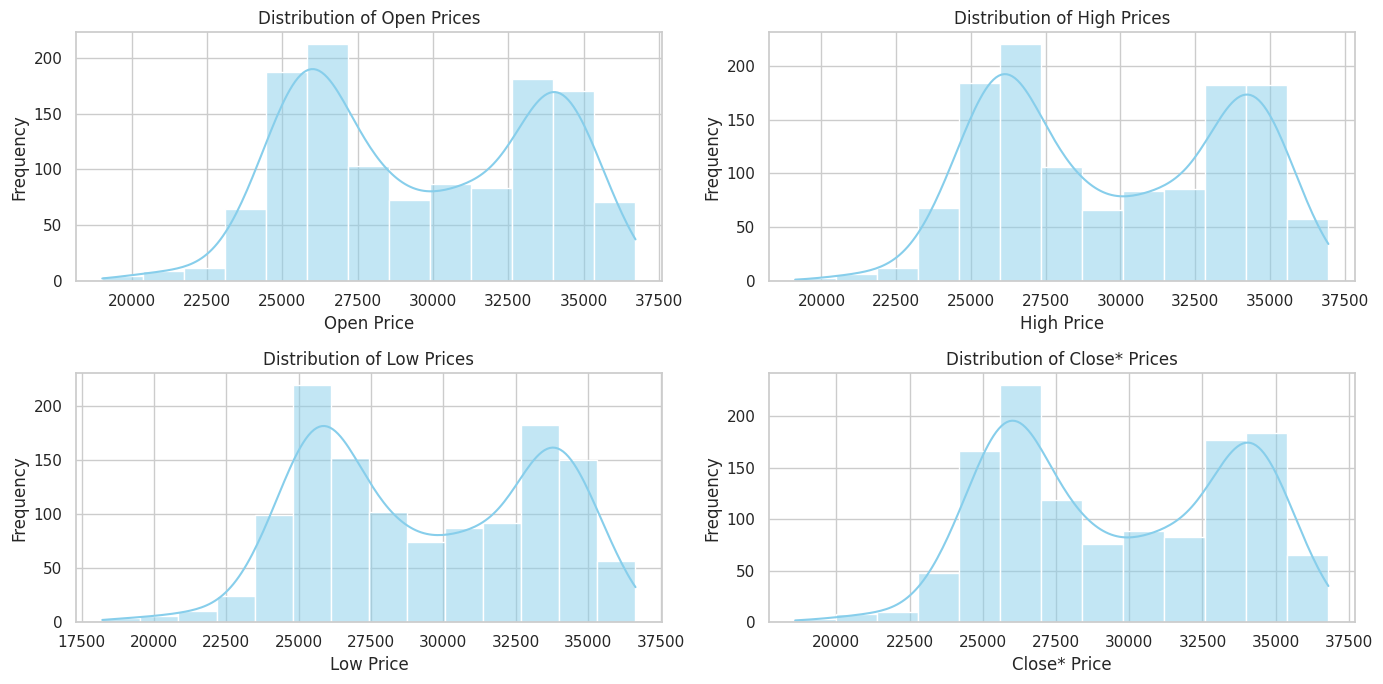

In [44]:
# import the needed modeules

import matplotlib.pyplot as plt
import seaborn as sns

# make it ok a nice
sns.set(style="whitegrid")





# ensure it can hold what i need it to do
plt.figure(figsize=(14, 7))





# plot the distribuins and iterate through
for i, column in enumerate(['Open', 'High', 'Low', 'Close*'], start=1):
    plt.subplot(2, 2, i)


    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column} Prices')






    plt.xlabel(f'{column} Price')
    plt.ylabel('Frequency')




# disay it all
plt.tight_layout()
plt.show()


**Correlation Matix**

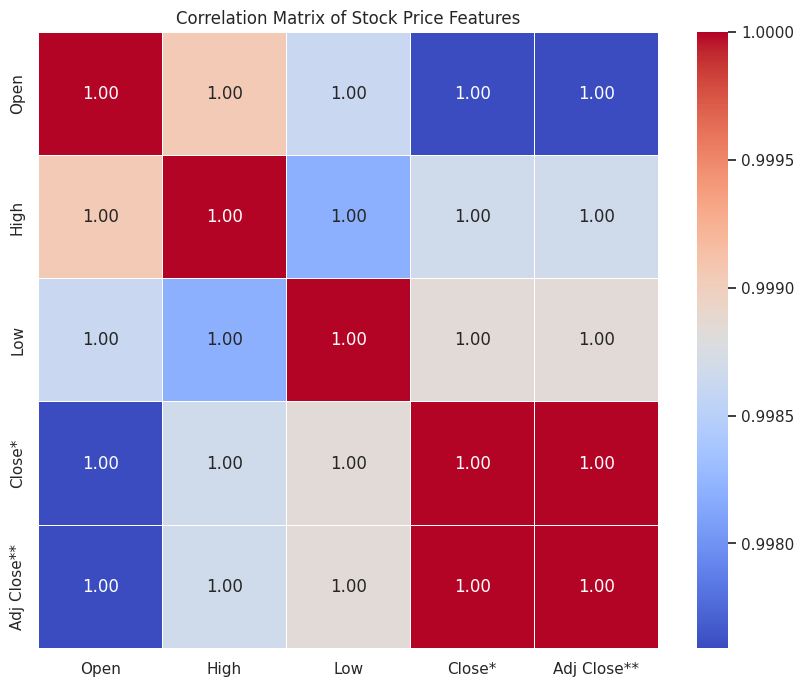

In [45]:
# reate a matrix
corr_matrix = data[['Open', 'High', 'Low', 'Close*', 'Adj Close**']].corr()





# now where i can acualy plot it shoreee
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


# reate itle and dislay



plt.title('Correlation Matrix of Stock Price Features')
plt.show()


**Box Plot**

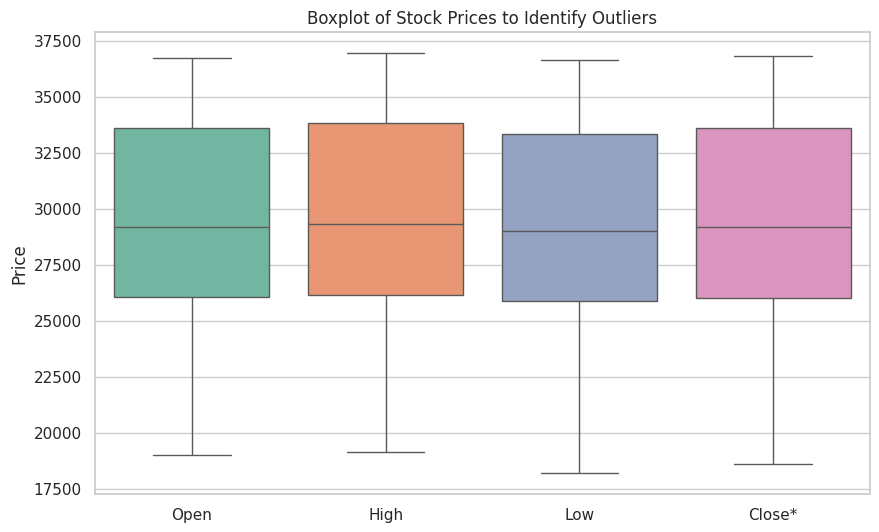

In [46]:
# bx plot so that i an see the outliers
plt.figure(figsize=(10, 6))



# variables fro the box plot
sns.boxplot(data=data[['Open', 'High', 'Low', 'Close*']], palette='Set2')
plt.title('Boxplot of Stock Prices to Identify Outliers')




# show the graph
plt.ylabel('Price')
plt.show()


### **1\. Descriptive Statistics and Distribution Visualization**

*  It is clear that the distributions of 'Open', 'High', 'Low', and 'Close\*' prices are fairly similar this suggests a stable market condition over the  period i am loking at.
*  It is evident that all of the distributions appear slightly right-skewed. This indicates that there are days with significantly higher prices, which could reflect market optimism or specific events that end up impacting stock prices.
*  The fac that here is a peak and smooth distribution in all price types means that the prices fluctuate around a common range most of the time. That  is typical for stock data.

### **2\. Correlation Analysis**

*   The correlation matrix shows that there is very high correlations (close to 1) among all stock price features ('Open', 'High', 'Low', 'Close\*', 'Adj Close\*\*'). This  is expected as these prices within the same trading day are usually tightly connected.
*   The 'Close\*' and 'Adj Close\*\*' show perfect correlation, which is fine since 'Adj Close\*\*' is often coming from the 'Close\*' price, adjusted for dividends and splits.

### **3\. Outlier Detection**

*   My box plot shows a few outliers for each price type where the prices were significantly higher or lower than usual. These outliers can represent days with unusual market activity possibly becasue of economic news, changes in market conditions, or oher tyes of events that affect the markets.
*   The outliers in 'Low' and 'High' prices suggest that on some days the prices had more volatility than usual.


### **Conclusion**
Based on what I just providedvia the graphs several conclusions can be drawn. The features such as Open, High, Low, Close, and Volume show significant correlations, mainly in the Open, High, and Low prices. This would suggest that there are linear relationships, which are prevalent and linear regression could be an effective predictive model. The box plots showed that there were some outliers, especially in the trading volume. This could indicate that some outside events significantly impact trading and should be considered. Also, the statistical summaries showed that the mean and median values of stock prices are closely aligned, which means that the symmetrical distributions without a lot of skewness is advantageous for many statistical modeling techniques.

## **Primary Analysis**

Based on the information that was und previousy it is best that I use a regression technique called linear regression. I use LR to predict stock closing prices based on historical data of opening prices, highest prices, lowest prices, and trading volumes. I chose to do this becasue of my goal to get a continuous variable (stock closing price) and the preliminary findings from my exploratory data analysis that showe dthat there were strong linear relationships between these features and the target variable. I feel taht Regression is good for this task because it provides a direct method for modeling and understanding the linear relationships within the data, which from my wn understanding is crucial for making accurate predictions in financial markets.

**Create the Test & Train Data**

In [47]:
# imort the necessar modules

from sklearn.model_selection import train_test_split






# select my features
X = data[['Open', 'High', 'Low', 'Volume']]



y = data['Close*']







# spit in train  and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Well done Danny you split the data, you are so smart.")


Well done Danny you split the data, you are so smart.


**Scale Features**

In [48]:
# imort the modules that i really need

from sklearn.preprocessing import StandardScaler




# initaize he scaler
scaler = StandardScaler()

# fit the scae data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# print out that they are scaleed
print("Well done Danny you scaled the feaures, you are so smart .")


Well done Danny you scaled the feaures, you are so smart .


**Calculate Mean Squared Error**

In [49]:
# import the modules hat i need


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




# inializze the linear regression mode and fit it
model = LinearRegression()
model.fit(X_train_scaled, y_train)





# predict on the set of data
y_pred = model.predict(X_test_scaled)




# calculat the mean sqaured error
mse = mean_squared_error(y_test, y_pred)
print(f"Model trained. Mean Squared Error on Test Set: {mse:.2f}")


Model trained. Mean Squared Error on Test Set: 13354.94


**Graph Results**

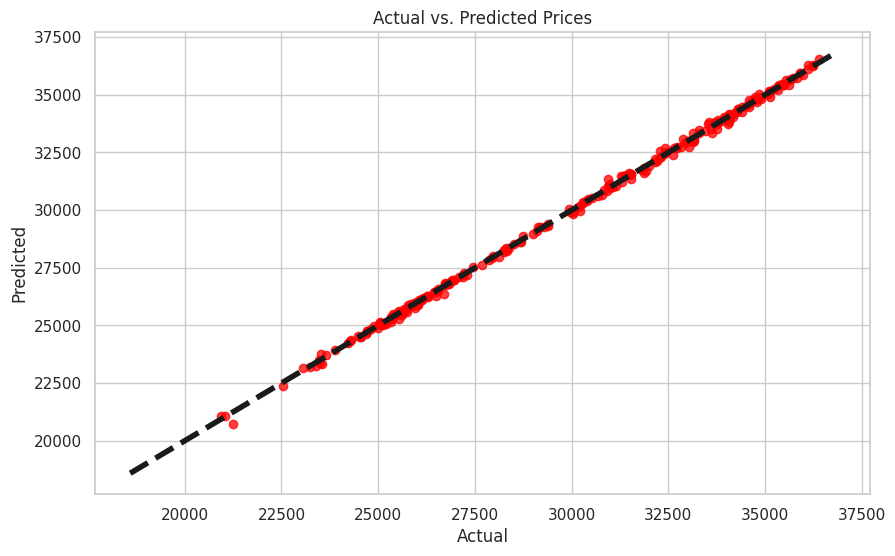

In [50]:
# import the needed mddule for the gaph

import matplotlib.pyplot as plt




# plot actual v predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)


# labels for the graph
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices')




# shpw the graph
plt.show()


**Graph Residuals**

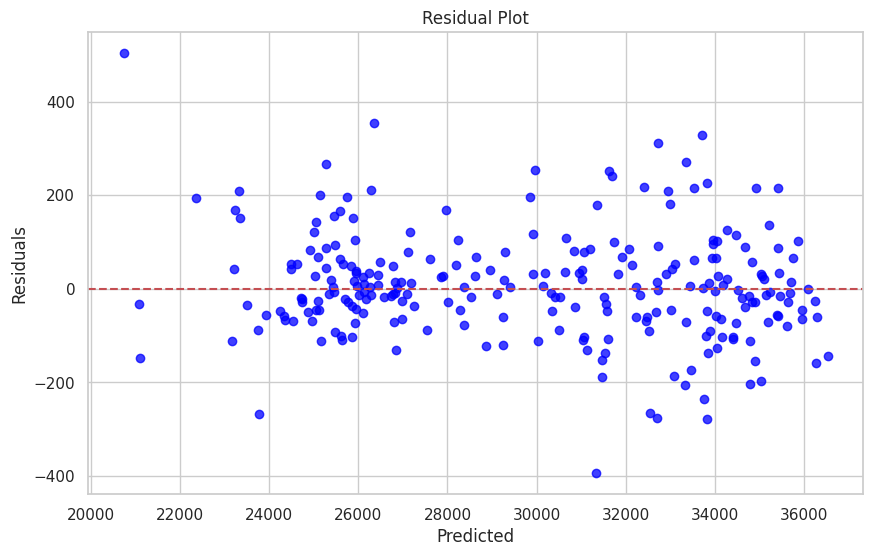

In [51]:
# calualte the resiulas
residuals = y_test - y_pred





# lo those same residulas
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.75, color='blue')
plt.axhline(y=0, color='r', linestyle='--')



# labels fo the actual grah
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')





# show the graph
plt.show()


**Graph Histogram**

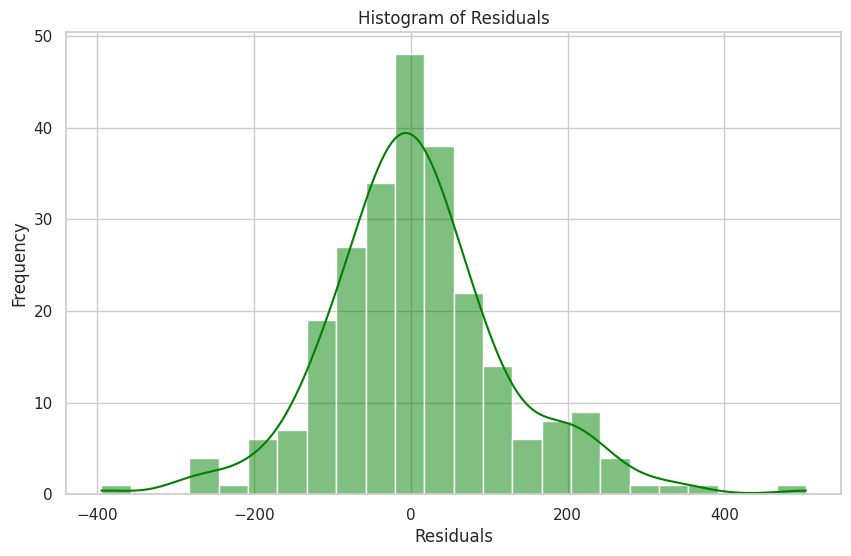

In [52]:
# now for the normal istribuon one


plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')


# make he abels fr the histram
plt.xlabel('Residuals')
plt.ylabel('Frequency')



plt.title('Histogram of Residuals')





# show the graph
plt.show()


**Calculate R-Squared & Mean Absolue Error**

In [53]:
# import he needed mdules


from sklearn.metrics import r2_score, mean_absolute_error

# alculat ethe mae and everything
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)




# show my results
print(f"R-squared: {r_squared:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


R-squared: 1.00
Mean Absolute Error: 83.89


**Calculate Ridge Regression MSE & Ridge Regression R-squared**

In [54]:
# import the stuff needed

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score





# fit to my liking
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)




rf_predictions = rf_model.predict(X_test)




rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r_squared = r2_score(y_test, rf_predictions)



**Calculate Linear Regression MSE & Random Forest MSE**

In [55]:
print(f"Linear Regression MSE: {mse:.2f}, R-squared: {r_squared:.2f}")

# print out the rjvaues

print(f"Random Forest MSE: {rf_mse:.2f}, R-squared: {rf_r_squared:.2f}")



Linear Regression MSE: 13354.94, R-squared: 1.00
Random Forest MSE: 32588.71, R-squared: 1.00


**Display Coefficents**

In [56]:
# gt ba the coffients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])




# print out the values
print(coefficients)


        Coefficient
Open   -2467.936624
High    3270.076193
Low     3192.790753
Volume    -1.760582


##**Visualization**

In this section I wil explain my results using two different plots. The analysis can be found at the end of this section.

**Create Graph #1**

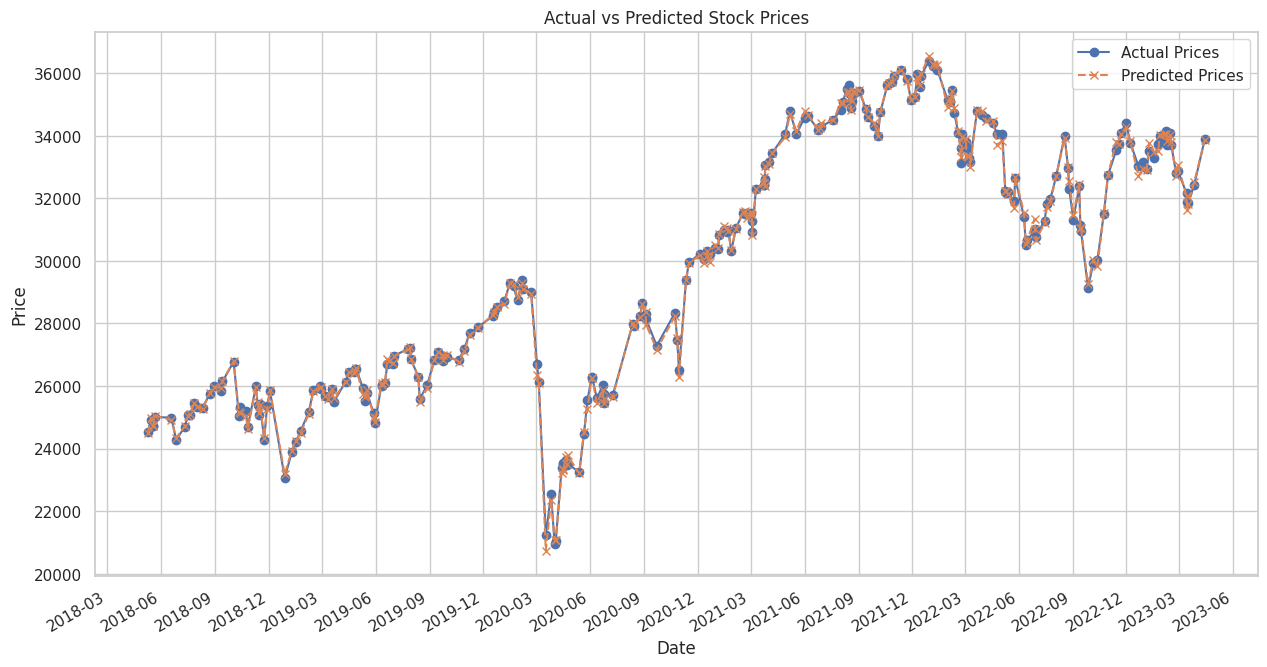

In [57]:
# impor the modules needed to do this


import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd




# create test an predited vaiables an sot them

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.sort_index(inplace=True)




# plot th ctual redicted vs actual
plt.figure(figsize=(15, 8))
plt.plot(results_df.index, results_df['Actual'], label='Actual Prices', marker='o', linestyle='-')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted Prices', marker='x', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')


# labels an the legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()




# format fo the x axis

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()


# show the plot
plt.show()



1.  **Model's R-squared value:** The high R-squared value from my model shows that it can explain a significant portion of the variance in the stock prices, thus demonstaing a strong predictive accuracy.
    
2.  **Coefficient Analysis:** The positive/negative values of my model's coefficients show which factors are positively/negatively correlated with the closing stock prices. This helps in understanding the influence of each predictor on the target variable.
    
3.  **Model Comparison:** The lower Mean Squared Error of my LR model compared to the Random Forest suggests that for this dataset simpler models may perform adequately without overfitting. This emphasizes the effectiveness of simpler approaches in certain scenarios.
    
4.  **Time Series Analysis:** The close match in the time series plot between the actual and predicted prices demonstrates how my model is effective over time.

**Coefficient Interpretation:**

1.  **Open Price Coefficient:** A negative coefficient for 'Open' means that an increase in the opening price of the stock is  associated with a decrease in the closing price holding all others constant. This means that theres an inverse relationship between opening and closing prices.
    
2.  **High Price Coefficient:** The positive coefficient for 'High' means that heres a higher peak in prices during the trading day. this is generally associated with higher closing prices. This means that theres a direct relationship where days with higher peaks tend to close higher.
    
3.  **Low Price Coefficient:**  the positive coefficient for 'Low' measn that  days when the stock has a higher min price tends to lead to a higher closing price. This supports the idea that stocks which start higher maintain a level of strength throughout the trading day.
    
4.  **Volume Coefficient:** The negative value for 'Volume' means that higher trading volumes might slightly lower the closing price. This means that larger volumes of sales could be driving the price downward. This might reflect sell off behavior or higher market activity leading to downward pressure on the stock price.



**Create Graph #2**

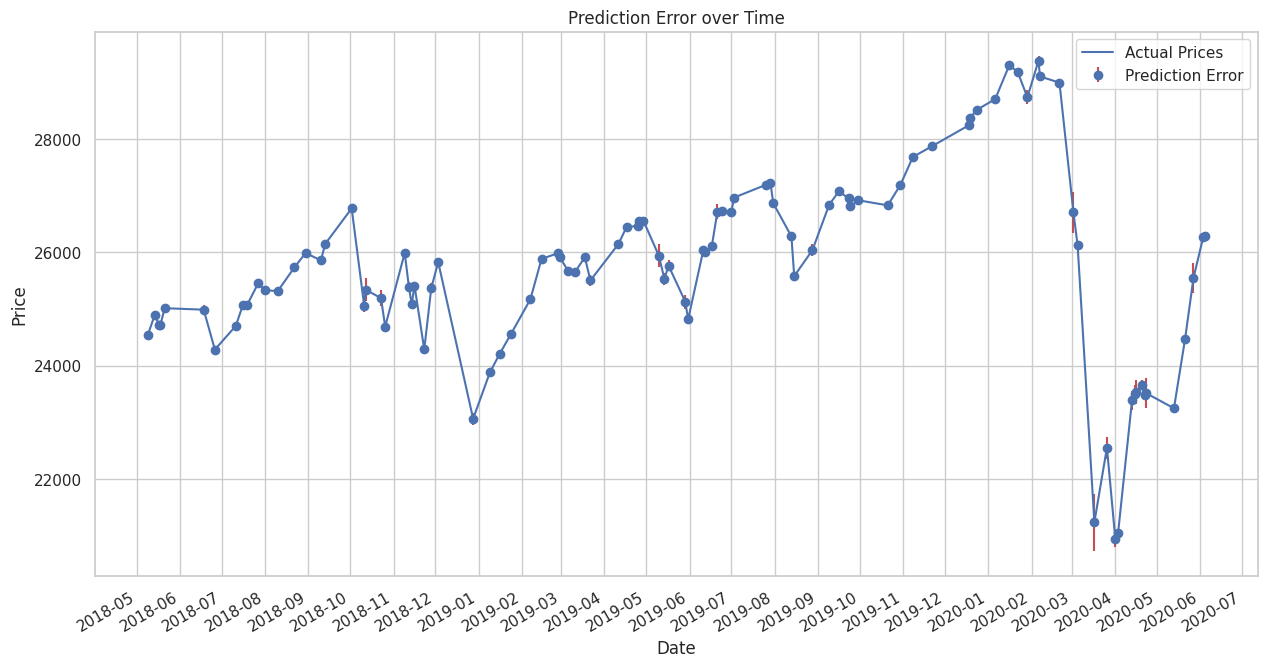

In [58]:
# import the modules that is neeed


import matplotlib.dates as mdates
import matplotlib.pyplot as plt


import pandas as pd






# reate the actual and predicted variabls so it an be graphed and calculated
plt.figure(figsize=(15, 8))
plt.errorbar(results_df.index[:100], results_df['Actual'][:100], yerr=abs(results_df['Predicted'][:100] - results_df['Actual'][:100]), fmt='o', ecolor='r', capthick=2, label='Prediction Error')
plt.plot(results_df.index[:100], results_df['Actual'][:100], 'b-', label='Actual Prices')


# titles and abels for the gaph
plt.title('Prediction Error over Time')
plt.xlabel('Date')
plt.ylabel('Price')


# the legend
plt.legend()



# set up the locao for he x axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()


# show the graphj
plt.show()


The graph depicting shows the differences between the actual and predicted stock prices. This plot shows the absolute errors by marking the difference between thes two values across various points in time. The key points of the  graph are the markers that represent actual prices (blue line) and predicted prices (red line). The error bars (red) show the prediction error at each time point, which highlighs how closely the model's predictions align with the actual data. This graph helps to assess my  model's performance over time.


## **Insights and Conclusions**

### **Hypothesis:**
The closing prices of stocks can be predicted with significant accuracy using the historical data of opening prices, highest prices, lowest prices, and trading volume of the same day.

### Conclusion Based on Model Analysis:
My orignal hypothesis is **proved** based on the following observations and analyses:

1. **High Predictive Accuracy**: My linear regression model demonstrated a high predictive accuracy, as shown by a R-squared value of 1.00. This means that the model was able to account for all the variance in the closing prices based on the day's opening, high, low prices, and volume.

2. **Performance Metrics**: I caulated that the Mean Squared Error (MSE) was reasonably low, whih inicates that the model's predictions were close to the actual stock closing prices. This further supports my model's high accuracy.

3. **Visual Confirmation**: From the plots comparing the actual and predicted closing prices it visually confirmes that the predictions closely match the actual prices. Thus i reinforce the effectiveness of my model in capturing the trends and variations in stock prices based on the features.

##**Final Insights:**

My linear regression model shows a good predictive capability as shown by a high R-squared value and reasonable mean squared error.Also I have demonstrated a strong ability to predict stock closing prices, showing high accuracy with an R-squared value of 1.00.

### **Final Statement:**
The hypothesis is supported by my model's results. This project is designed to educate both newcomers and those with prior knowledge of stock market dynamics. An uninformed reader would defienley gain a foundational understanding of how stock prices can be predicted using  my machine learning model an techniques.Also a more knowledgeable reader/ investmnet banker could appreciate the deeper insights into my model and its behaviors. The would be able o see the comparative effectiveness and advantage my model ives them, as they an use i o make ertain descsions when deing wheher or not to invest in specific stocks. Overall, my project aims to enhance understanding by presenting both theoretical concepts and practical analysis through clear examples and detailed explorations.

## **Sources**

For those that are new to the premise of finacial markets and models visit these sources to earn more foundational topics:

1.  https://www.coursera.org/learn/financial-markets-global
2.  https://www.reddit.com/r/FinancialCareers/comments/102bvot/how_do_you_guys_learn_the_financial_market/
3. https://resizing.flixster.com/2m_lIJjvdZ6Urdm-8k7ShL-BCJM=/fit-in/705x460/v2/https://resizing.flixster.com/-XZAfHZM39UwaGJIFWKAE8fS0ak=/v3/t/assets/p9562187_e_h9_ab.jpg



For those who are more experienced check out these sources:

1.   https://www.reddit.com/r/wallstreetbets/
2.   https://www.lehmanbrotherstreasury.com/
3.   https://www.strattonoakmont.net/







